<a href="https://colab.research.google.com/github/fulup2022/formationpublic/blob/main/Training_models_on_basic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.First we get the data

In [ ]:
# First we map the drive to access the data file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# We load the data file
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/DSTI/Churn/Bank churn/Bank_churn_dataset.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2.Data exploration and features analysis

In [ ]:
# We check the shape of the dataset and the columns names
print(f"Shape = {dataset.shape}")
print(f"The names of the columns = {dataset.columns}")
print(f"The range of the index = {dataset.index}")

Shape = (10000, 14)
The names of the columns = Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
The range of the index = RangeIndex(start=0, stop=10000, step=1)


In [ ]:
# Another way to get a summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# We check if there is some Nan in the dataset
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# we check the data ventilation
dataset.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


We notice that there are only 2932 distinct surnames among the 10 000 data samples. We can deduce that it is not a real dataset since it seems doubtful that there are so few names shared by all the clients.

We have two genders with a good repartition between males and females.

For the exited values, we can notice that there are around 20% of clients who have churned. It means that we have unbalanced data and it will be necessary to handle this aspect.

In [ ]:
dataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

There is maybe something to do about this point

In [ ]:
# We take our features in a  new dataset. 
# We exclude the three first columns of the original dataset since they are too specific and the last one since it is the label
df = dataset.iloc[:, 3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Analysis of features types
numerical_features = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
categorical_features = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
label = ['Exited']

In [ ]:
# For the different categorical features, we check the possible values
for c in categorical_features:
  print(df.groupby(c)[c].size())
  print (' ')

HasCrCard
0    2945
1    7055
Name: HasCrCard, dtype: int64
 
IsActiveMember
0    4849
1    5151
Name: IsActiveMember, dtype: int64
 
Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
 
Gender
Female    4543
Male      5457
Name: Gender, dtype: int64
 


In [ ]:
# we copy the data to make some analysis without modifying the original dataset
df_analysis = df.copy()
df_analysis.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# For the categorical features that are in string format, we replace the values by a corresponding integer in order to be able to calulate a correlation with other features for these values
df_analysis.Geography = df_analysis.Geography.map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df_analysis.Gender = df_analysis.Gender.map({'Female' : 0, 'Male' : 1})

In [ ]:
df_analysis.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


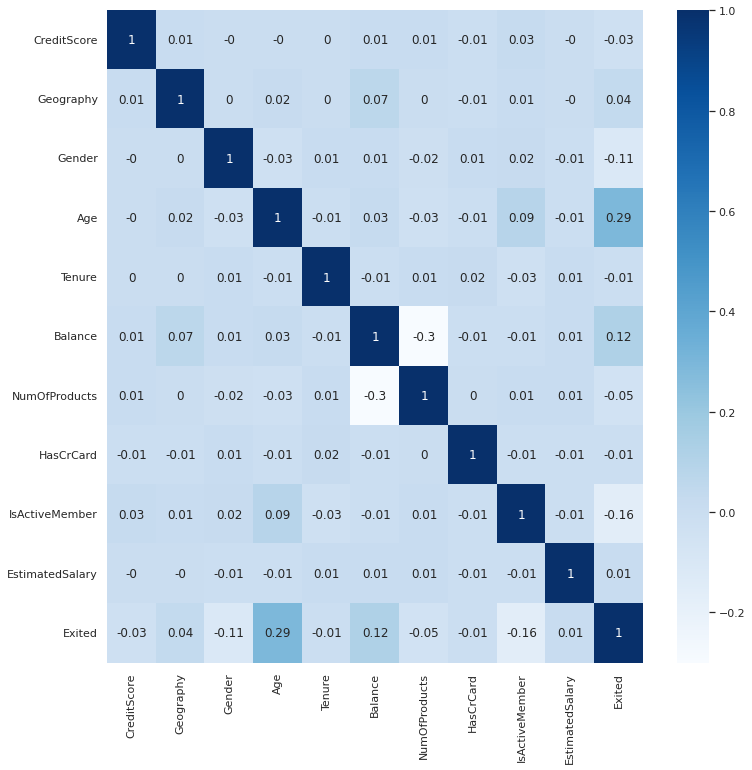

In [ ]:
# calculate the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure(figsize = (12,12))
sns.set()
sns.heatmap(df_analysis.corr().round(2), annot = True, cmap = "Blues")

**So we notice that there is no correlation between the different features, and there is sense to keep them all.**

# 3.Split of the data in train/test and preparing the automatic data transformation

In [ ]:
# we make the data split between train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [ ]:
print(f"The shape of train : {df_train.shape}")
print(f"The shape of test : {df_test.shape}")

The shape of train : (8000, 11)
The shape of test : (2000, 11)


In [ ]:
df_train_x = df_train.iloc[:,:-1]
df_train_y = df_train.iloc[:,-1]
df_test_x = df_test.iloc[:,:-1]
df_test_y = df_test.iloc[:,-1]

In [ ]:
df_train_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2694,628,Germany,Male,29,3,113146.98,2,0,1,124749.08
5140,626,France,Female,29,4,105767.28,2,0,0,41104.82
2568,612,Germany,Female,47,6,130024.87,1,1,1,45750.21
3671,646,Germany,Female,52,6,111739.40,2,0,1,68367.18
7427,714,Spain,Male,33,8,122017.19,1,0,0,162515.17


In [ ]:
# we prepare the transformation operations on numerical features and string features in pipelines in order to be able to apply the same transformations for the future model in prediction
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())

categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OrdinalEncoder())

In [ ]:
# we include the transformation operations into a single column transformer. Each transformation applies to the corresponding features
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), (categorical_pipeline, categorical_features))

In [ ]:
# test of the automatic transformations
preprocessor.fit_transform(df_train_x)


array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.        ,
         1.        ,  1.        ],
       [-0.25150912, -0.94449979, -0.35520275, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.13123255,  0.01077067,  1.03095433, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.        ,
         1.        ,  1.        ]])

# 4.Trying several models

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/projet/'

/content/drive/MyDrive/Colab Notebooks/projet


In [ ]:
# we have to install scikeras to be able to import the specific modules that have been developped
!pip install scikeras

In [ ]:
# we import one specific class ModelWrapper and one specific function model_nn that will be used for the models processing
from specific_modules import ModelWrapper, model_nn

In [ ]:
list_of_models = []

## 4.1.Model 1 : XGBClassifier

In [ ]:
# we try the XGB model with a GridSearchCV to optimize the hyper parameters
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_xgb_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1,0.2], 'n_estimators':[5,10]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid = param_xgb_grid, cv=5, refit=True, verbose=0)

model1 = ModelWrapper(base_preprocessor=preprocessor, base_model=xgb_grid, tag='XGBClassifier trained on basic data')

In [ ]:
model1.fit(df_train_x, df_train_y)

Tag : 'XGBClassifier trained on basic data'
Model name : GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'gamma': [0.01, 0.001],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [5, 6, 7, 8],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [5, 10]})
Best estimator : XGBClassifier(gamma=0.01, learning_rate=0.2, max_depth=6, n_estimators=10)
Best score : 0.8612500000000001

In [ ]:
modele1_training_analysis = pd.DataFrame(model1.named_steps['model'].cv_results_)
modele1_training_analysis.sort_values(by=['mean_test_score'], ascending=False).head()

In [ ]:
model1_predictions = model1.predict(df_test_x)

In [ ]:
model1.evaluate(y_true = df_test_y, y_pred = model1_predictions)

Confusion matrix : array([[1538,   47],
       [ 233,  182]])
Precision : 0.7947598253275109
Accuracy : 0.86
Recall : 0.43855421686746987


In [ ]:
model1.calculate_roc(y_true = df_test_y, y_score = model1.predict_proba(df_test_x)[:,1])

Roc_auc_score : 0.8692250389570901


In [ ]:
list_of_models.append(model1)

## 4.2.Model 2 : Logistic regression

In [ ]:
# Fit logistic regression
from sklearn.linear_model import LogisticRegression

param_logistic_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
logistic_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid = param_logistic_grid, cv = 10, refit=True, verbose=0)

model2 = ModelWrapper(base_preprocessor=preprocessor, base_model = logistic_Grid, tag = 'LogisticRegression trained on basic data')

In [ ]:
model2.fit(df_train_x, df_train_y)

Tag : 'LogisticRegression trained on basic data'
Model name : GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'max_iter': [250], 'penalty': ['l2'],
                         'tol': [1e-05, 0.0001, 1e-06]})
Best estimator : LogisticRegression(C=0.5, max_iter=250, tol=1e-05)
Best score : 0.810125

In [ ]:
model2_predictions = model2.predict(df_test_x)

In [ ]:
model2.evaluate(y_true = df_test_y, y_pred = model2_predictions)

Confusion matrix : array([[1536,   49],
       [ 339,   76]])
Precision : 0.608
Accuracy : 0.806
Recall : 0.18313253012048192


In [ ]:
model2.calculate_roc(y_true = df_test_y, y_score = model2.predict_proba(df_test_x)[:,1])

Roc_auc_score : 0.7609623351449964


In [ ]:
list_of_models.append(model2)

## 4.3.Model 3 : SVM with Pol Kernel

In [ ]:
# Fit SVM
from sklearn.svm import SVC

param_svm_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
svm_Grid = GridSearchCV(SVC(),param_grid = param_svm_grid, cv = 3, refit=True, verbose=0)

model3 = ModelWrapper(base_preprocessor=preprocessor, base_model = svm_Grid, tag = 'SVM trained on basic data')

In [ ]:
model3.fit(df_train_x, df_train_y)

Tag : 'SVM trained on basic data'
Model name : GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10, 50, 100], 'degree': [2, 3],
                         'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly'],
                         'probability': [True]})
Best estimator : SVC(C=50, gamma=0.1, kernel='poly', probability=True)
Best score : 0.8466245732786777

In [ ]:
model3_predictions = model3.predict(df_test_x)

In [ ]:
model3.evaluate(y_true = df_test_y, y_pred = model3_predictions)

Confusion matrix : array([[1567,   18],
       [ 274,  141]])
Precision : 0.8867924528301887
Accuracy : 0.854
Recall : 0.3397590361445783


In [ ]:
model3.calculate_roc(y_true = df_test_y, y_score = model3.predict_proba(df_test_x)[:,1])

Roc_auc_score : 0.8331678765535326


In [ ]:
list_of_models.append(model3)

## 4.4.Model 4 : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_rf_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid = param_rf_grid, cv=5, refit=True, verbose=0)

model4 = ModelWrapper(base_preprocessor=preprocessor, base_model=rf_grid, tag = 'RandomForest trained on basic data')

In [ ]:
model4.fit(df_train_x, df_train_y)

Tag : 'RandomForest trained on basic data'
Model name : GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 6, 7, 8],
                         'max_features': [2, 4, 6, 7, 8, 9],
                         'min_samples_split': [3, 5, 6, 7],
                         'n_estimators': [50, 100]})
Best estimator : RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=6,
                       n_estimators=50)
Best score : 0.85925

In [ ]:
model4_predictions = model4.predict(df_test_x)

In [ ]:
model4.evaluate(y_true = df_test_y, y_pred = model4_predictions)

Confusion matrix : array([[1545,   40],
       [ 233,  182]])
Precision : 0.8198198198198198
Accuracy : 0.8635
Recall : 0.43855421686746987


In [ ]:
model4.calculate_roc(y_true = df_test_y, y_score = model4.predict_proba(df_test_x)[:,1])

Roc_auc_score : 0.8716780053969821


In [ ]:
list_of_models.append(model4)

## 4.5.Model 5 : Neural network

In [ ]:
from scikeras.wrappers import KerasClassifier

model5 = ModelWrapper(base_preprocessor=preprocessor, base_model=KerasClassifier(model = model_nn, batch_size=100, verbose = 2).set_params(epochs = 200), tag = 'NeuralNetwork trained on basic data')

In [ ]:
model5.fit(df_train_x, df_train_y)

Epoch 1/200
80/80 - 1s - loss: 0.6097 - accuracy: 0.7922 - mean_squared_error: 0.2107 - auc: 0.5237 - 916ms/epoch - 11ms/step
Epoch 2/200
80/80 - 0s - loss: 0.4479 - accuracy: 0.7972 - mean_squared_error: 0.1434 - auc: 0.7382 - 106ms/epoch - 1ms/step
Epoch 3/200
80/80 - 0s - loss: 0.4333 - accuracy: 0.7972 - mean_squared_error: 0.1381 - auc: 0.7630 - 105ms/epoch - 1ms/step
Epoch 4/200
80/80 - 0s - loss: 0.4284 - accuracy: 0.7972 - mean_squared_error: 0.1362 - auc: 0.7717 - 96ms/epoch - 1ms/step
Epoch 5/200
80/80 - 0s - loss: 0.4236 - accuracy: 0.7972 - mean_squared_error: 0.1343 - auc: 0.7803 - 97ms/epoch - 1ms/step
Epoch 6/200
80/80 - 0s - loss: 0.4183 - accuracy: 0.7972 - mean_squared_error: 0.1324 - auc: 0.7899 - 109ms/epoch - 1ms/step
Epoch 7/200
80/80 - 0s - loss: 0.4111 - accuracy: 0.7972 - mean_squared_error: 0.1297 - auc: 0.8013 - 100ms/epoch - 1ms/step
Epoch 8/200
80/80 - 0s - loss: 0.4042 - accuracy: 0.7972 - mean_squared_error: 0.1273 - auc: 0.8112 - 123ms/epoch - 2ms/step
E

Tag : 'NeuralNetwork trained on basic data'
Model name : KerasClassifier(
	model=<function model_nn at 0x7fc81f513a70>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=2
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=200
	class_weight=None
)
ModelWrapper(base_model=KerasClassifier(batch_size=100, epochs=200, model=<function model_nn at 0x7fc81f513a70>, verbose=2), base_preprocessor=ColumnTransformer(transformers=[('pipeline-1', Pipeline(steps=[('simpleimputer', SimpleImputer()), ('standardscaler', StandardScaler())]), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']), ('pi...cts', 'EstimatedSalary']), ('pipeline-2', Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')), ('ordinalencoder', OrdinalEncoder())]), ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender'])])), ('model', KerasClassifier(batch_size=

In [ ]:
model5_predictions = model5.predict(df_test_x)

20/20 - 0s - 76ms/epoch - 4ms/step


In [ ]:
model5.evaluate(y_true = df_test_y, y_pred = model5_predictions)

Confusion matrix : array([[1523,   62],
       [ 216,  199]])
Precision : 0.7624521072796935
Accuracy : 0.861
Recall : 0.4795180722891566


In [ ]:
model5.calculate_roc(y_true = df_test_y, y_score = model5.predict_proba(df_test_x)[:,1])

20/20 - 0s - 24ms/epoch - 1ms/step
Roc_auc_score : 0.8674866025616661


In [ ]:
list_of_models.append(model5)

# 5.Summary of all models

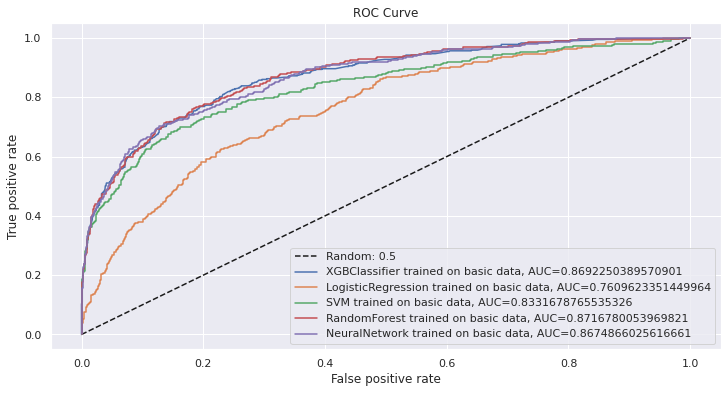

In [ ]:
global_report = pd.DataFrame(columns = ['Tag', 'Description' , 'Confusion matrix', 'Accuracy', 'Precision', 'Recall', 'ROC'])

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

for model in list_of_models:
  global_report = global_report.append(model.get_performances(),ignore_index = True)
  plt.plot(model.fpr, model.tpr, label=str(model.tag) + ", AUC=" + str(model.roc_auc_score))

plt.legend(loc='best')

In [ ]:
global_report

,Tag,Description,Confusion matrix,Accuracy,Precision,Recall,ROC
0,XGBClassifier trained on basic data,"GridSearchCV(cv=5, estimator=XGBClassifier(),\...","[[1538, 47], [233, 182]]",0.8600,0.794760,0.438554,0.869225
1,LogisticRegression trained on basic data,"GridSearchCV(cv=10, estimator=LogisticRegressi...","[[1536, 49], [339, 76]]",0.8060,0.608000,0.183133,0.760962
2,SVM trained on basic data,"GridSearchCV(cv=3, estimator=SVC(),\n ...","[[1567, 18], [274, 141]]",0.8540,0.886792,0.339759,0.833168
3,RandomForest trained on basic data,"GridSearchCV(cv=5, estimator=RandomForestClass...","[[1545, 40], [233, 182]]",0.8635,0.819820,0.438554,0.871678
4,NeuralNetwork trained on basic data,KerasClassifier(\n\tmodel=<function model_nn a...,"[[1523, 62], [216, 199]]",0.8610,0.762452,0.479518,0.867487


# 6.Saving the models

In [ ]:
import os
import pickle

path_for_models_trained_on_basic_data = '/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/'

for model in list_of_models:
  
  try:
    os.remove(path_for_models_trained_on_basic_data + model.tag + '.sav')
    print(path_for_models_trained_on_basic_data + model.tag + '.sav has been deleted')
  except:
    print(model.tag + ' does not exist')

  with open(path_for_models_trained_on_basic_data + model.tag + '.sav', 'wb') as f:

    pickle.dump(model, f)
    f.close()

    print(path_for_models_trained_on_basic_data + model.tag + '.sav has been saved')

/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/XGBClassifier trained on basic data.sav has been deleted
/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/XGBClassifier trained on basic data.sav has been saved
LogisticRegression trained on basic data does not exist
/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/LogisticRegression trained on basic data.sav has been saved
/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/SVM trained on basic data.sav has been deleted
/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/SVM trained on basic data.sav has been saved
/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/RandomForest trained on basic data.sav has been deleted
/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/RandomForest trained on basic data.sav has been saved
/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/NeuralNetwork trained on basic dat